<a href="https://colab.research.google.com/github/augustodelg/IA/blob/Pruebas/IA_Eje1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles


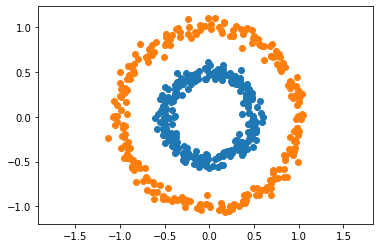

In [53]:
#se crea el datasets

n = 500
p = 2

X, Y = make_circles(n_samples=n, noise=0.05, factor=0.5)

plt.scatter(X[Y==1 ,0],X[Y==1,1])
plt.scatter(X[Y==0 ,0],X[Y==0,1])
plt.axis('equal')
plt.show()


In [0]:
#Clase de capas de neuronas

class neuronal_layer():
    def __init__(self,n_connections, n_neurons, act_fuction):
      self.act_fuction = act_fuction
      #inicializacion aleatoria
      self.b =  np.random.rand(1, n_neurons) * 2  -1 # * 2 -1 Es para normalizar estandarizar la red, va de -1 a 1
      self.w =  np.random.rand(n_connections , n_neurons) * 2  -1

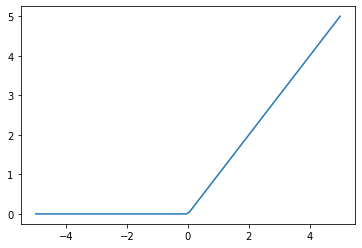

In [31]:
#Funciones de activacion

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_derivada(x):
    return sigmoid(x)*(1.0-sigmoid(x))
 
def tanh(x):
    return np.tanh(x)
 
def tanh_derivada(x):
    return 1.0 - x**2

def relu(x):
    return np.maximum(0, x)

#Testeo con creacion de vectores acotados
_x = np.linspace(-5,5,100)
plt.plot(_x, relu(_x))

In [59]:

#Creacion de la red neuronal
def create_nn(topology, act_fuction):

  neuronal_network = []
      # este for da tanto el INDICE COMO EL OBEJTO!
  for l, layer in enumerate(topology[:-1]):

    neuronal_network.append(neuronal_layer(topology[l], topology[l+1], act_fuction))

  return neuronal_network

#Testeo
topology = [p, 4, 8, 20, 4 , 1]

nn=create_nn(topology, sigmoid)
print(nn)

[<__main__.neuronal_layer object at 0x7f71dd118e48>, <__main__.neuronal_layer object at 0x7f71dd118eb8>, <__main__.neuronal_layer object at 0x7f71dd118ef0>, <__main__.neuronal_layer object at 0x7f71dd118f28>, <__main__.neuronal_layer object at 0x7f71dd118f60>]


In [63]:
#NOTA UTILIZACION DEL ALGORITMO del descenso del gradiente, con BACKPROPAGATION

#Entrenamiento de la red
topology = [p, 4, 8, 20, 4 , 1]

neuronal_network = create_nn(topology, sigmoid)

#Utilidades

error_cuadratico_medio = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
                          lambda Yp, Yr: (Yp - Yr))#[0] FORMULA DE ERRO , [1] DERIVADA

def train(neuronal_network, X, Y, error_cuadratico_medio, lr = 0.5, train=True): #Factor de multiplicacion, cantidad de actualizaciones
  
  out = [(None, X)] #Aca se guardan todas las salidad de cada capa

  # Forward pass

  for l, layer in enumerate(neuronal_network):

    z = out[-1][1] @ neuronal_network[l].w + neuronal_network[l].b # out[-1][1] El [-1] es para la ULTIMA SALIDAD y el [1] es para tomar a (que es el resultado de la funcion de activacion)
    a = neuronal_network[l].act_fuction(z)

    out.append((z, a))


  print(error_cuadratico_medio[0](out[-1][1], Y))

  if train:

    #Backward pass

    deltas = []

    for l in reversed(range(0, len(neuronal_network))):

      z = out[l+1][0]
      a = out [l+1][1] # activacion
      
      if l == len(neuronal_network) - 1:
        #Calcular ultima capa
        deltas.inset(0, error_cuadratico_medio[1](a, Y) * neuronal_network[l].act_fuction)
      else  
        #Calcular demas capas


#Test

train(neuronal_network, X, Y, error_cuadratico_medio, 0.5)

IndentationError: ignored